# Neural Networks Library

My idea of programming a library for Neural Networks started in 2021. I've began watching a lot of Youtube-Turorials about Machine Learning and programming in general. My experience since then had been Arduino, HTML/CSS/JS, LEGO-Mindstorms and Scratch, so to say the obvious, i was a bloody beginner.

## First Try Outs

In 2021 I got a Laptop from school because we had homeschooling and I started programming on it. I downloaded Python, Arduino and started first designing my first networks in Google-Colab (with tensorflow). Soon I also found a good tutorial to make my own Neural Networks (sentdex) and till then I had already a pretty good understanding of the logic behind a Neural Network, so all that was left was to be able to program it. I had multiple runs where I started this project again. Every time I ended up on a new problem, where often my understanding and motivation was done, but I always got on step further.

## This Project

This year 2022/23 I decided again to build a new version, that finally could optimize a Network efficiently. The first part of the year I took long time to build my mindset and decide what to focus on. In november I started my changing my daily mindset bit by bit, till in december I got to the decision to make less excuses and let what I had prepared in my head outside in my life. I changed my daily routine drastically and tried to stop instant gratification so I can build powerful habits.
Now in January, school has got back to regularity and my routine took a lot of will power but is still standing. For not falling in a routine where I don't continously conciously improve, I decided it's time to continue on this journey and start a new Neural Network project! 

In [205]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data, vertical_data
nnfs.init()

In [206]:
class ActivationFunction:
    def __init__(self):
        pass
    def run(self, inputs):
        return inputs
    def __call__(self, inputs):
        return self.run(inputs)

In [207]:
class ReLU(ActivationFunction):
    def __init__(self):
        pass
    def run(self, inputs):
        self.output = np.maximum(0,inputs)
        return self.output

In [208]:
class Softmax(ActivationFunction):
    def __init__(self):
        pass
    def run(self, inputs):
        exp_values = np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
        propabilities = exp_values / np.sum(exp_values, axis = 1, keepdims=True)
        self.output = propabilities
        return self.output

In [209]:
class Sigmoid(ActivationFunction):
    def __init__(self):
        pass
    def run(self, inputs):
        self.output = 1/(1+np.exp(-inputs))
        return self.output

In [210]:
class Loss:
    def __init__(self):
        pass
    def calc(self, output, y):
        
        sampleLosses = self.run(output, y)
        dataLoss = np.mean(sampleLosses)
        return dataLoss

In [211]:
class CategorialCrossEntropy(Loss):
    def __init__(self):
        pass
    def run(self, y_pred, y):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y]
        elif len(y.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y, axis=1)
        
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [212]:
class MeanSquaredError(Loss):
    def __init__(self):
        pass

In [213]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, ActivationFunction:ActivationFunction=None):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
        self.activationFunction = ActivationFunction
    def run(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        if self.activationFunction is not None:
            self.output = self.activationFunction.run(self.output)
        return self.output
    def __call__(self, inputs):
        return self.run(inputs)

In [214]:
class Network:
    def __init__(self, LossFunc:Loss):
        self.layerList:list(Layer_Dense) = []
        self.lossFunction:Loss = LossFunc
    def addLayer(self,layer:Layer_Dense):
        self.layerList.append(layer)
    def run(self, input, oneHot=False):
        for i in range(len(self.layerList)):
            input = self.layerList[i].run(input)
            #print("calc:\t"+str(i))
        self.output = input
        if oneHot:
            return np.argmax(self.output, axis=1)
        else:
            return self.output
    def __call__(self, input, oneHot=True):
        return self.run(input, oneHot)
    def calcLoss(self,y) -> float:
        return self.lossFunction.calc(self.output, y)
    def calcAccuracy(self, y) -> float:
        predictions = np.argmax(self.output, axis=1)
        if len(y.shape)==2:
            y=np.argmax(y,axis=1)
        accuracy = np.mean(predictions == y)
        return accuracy
    def optimizeRandomly(self, iterations, learningRate, X, y):
        self.run(X)
        lowestLoss = self.calcLoss(y)
        for i in range(iterations):
            weights = []
            biases = []
            for layer in self.layerList:
                weights.append(layer.weights.copy())
                biases.append(layer.biases.copy())
                shape = layer.weights.shape
                layer.weights = 0.01 * np.random.randn(shape[0], shape[1])
                layer.biases = np.zeros((1,shape[1]))
            self(X)
            loss = self.calcLoss(y)

            if loss < lowestLoss:
                lowestLoss = loss
                print("New optimal found: \t" + str(loss))
            else:
                for i in range(len(self.layerList)):
                    self.layerList[i].weights = weights[i]
                    self.layerList[i].biases = biases[i]

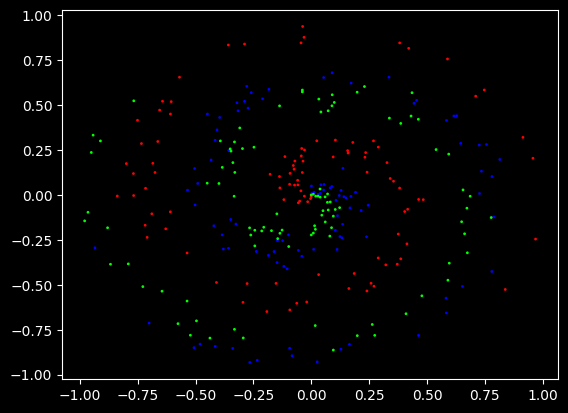

In [215]:
X, y = spiral_data(samples = 100, classes = 3)
plt.style.use('dark_background')
plt.scatter(X[:,0], X[:,1], c=y, s=1, cmap="brg")
plt.show()

In [216]:
myNN = Network(LossFunc=CategorialCrossEntropy())
myNN.addLayer(Layer_Dense(2, 5, ReLU()))
myNN.addLayer(Layer_Dense(5, 3, ReLU()))
myNN.addLayer(Layer_Dense(3, 3, Softmax()))

print(myNN.run(np.array([3,1])))
print("pause")
print(myNN.run(np.array(X))[:5])
print("Loss:\t"+ str(myNN.calcLoss(y)))
print("Accuracy:\t"+ str(myNN.calcAccuracy(y)))

[[0.33333334 0.33333334 0.33333334]]
pause
[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
Loss:	1.0986123
Accuracy:	0.3433333333333333


In [217]:
X, y = spiral_data(samples = 5000, classes = 3)


Loss:	1.0986117


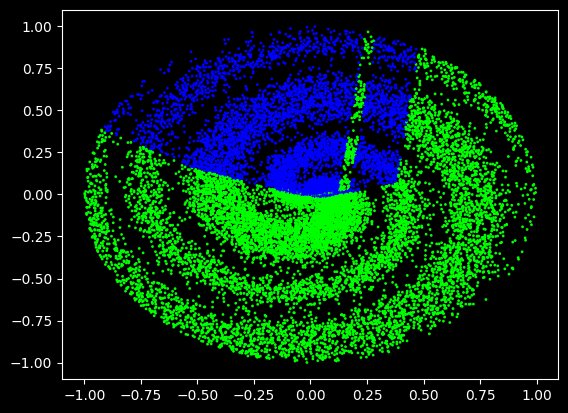

In [242]:
output = myNN(X)
print("Loss:\t"+str(myNN.calcLoss(y)))
plt.style.use('dark_background')
plt.scatter(X[:,0], X[:,1], c=output, s=1, cmap="brg")
plt.show()

In [240]:
myNN.optimizeRandomly(500, 0.05, X, y)